# BMI

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### 1. data

In [ ]:
# Raw Data Loading
data = r'/content/drive/MyDrive/LikeLion/ML/data/bmi.csv'
df = pd.read_csv(data, skiprows=3)

df.shape  # (20000, 3)

# 결측치 확인 및 처리
df.isnull().sum()  # 결측치는 없음

# 이상치 확인
zscore_threshold = 1.8
df.loc[np.abs(stats.zscore(df["height"])) >= zscore_threshold]
df.loc[np.abs(stats.zscore(df["height"])) >= zscore_threshold]
df.loc[np.abs(stats.zscore(df["height"])) >= zscore_threshold]

# x, t 데이터 나누기
x_data = df[['height', 'weight']].values  # 2차원
t_data = df['label'].values

# 정규화
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# 데이터 분할
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=0)

### 2. sklearn Model

In [ ]:
# Model
sklearn_model = linear_model.LogisticRegression()

sklearn_model.fit(x_data_train_norm,
                  t_data_train)

predict_value = sklearn_model.predict(x_data_test_norm)

# 평가는 accuracy
result = accuracy_score(t_data_test, predict_value)

print(result)  # 0.9855

# prediction
height = 187
weight = 80
my_state = np.array([[height, weight]])
my_result = sklearn_model.predict(scaler.transform(my_state))

print(my_result)  # [1]


0.9855
[1]


### 3. Tensorflow Model

In [ ]:
# Module import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Model
keras_model = Sequential()

# Layers
keras_model.add(Flatten(input_shape={2,}))
keras_model.add(Dense(units=3, activation="softmax"))

# Compile
keras_model.compile(optimizer=Adam(learning_rate=1e-2),
                    loss="sparse_categorical_crossentropy",  # 입력을 one-hot encoding으로 해줘야 함 => sparse
                    metrics=['acc'])

# 학습
keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=200,
                verbose=1,
                validation_split=0.2)

# 마지막 학습 결과
# 350/350 [==============================] - 1s 2ms/step - loss: 0.0636 - acc: 0.9813 - val_loss: 0.0548 - val_acc: 0.9843

In [ ]:
# Evaluation
model_eval = keras_model.evaluate(x_data_test_norm,
                                  t_data_test)

print(model_eval)  # [0.056868188083171844, 0.9853333234786987]

# prediction
height = 187
weight = 80
my_state = np.array([[height, weight]])
my_result = keras_model.predict(scaler.transform(my_state))

print(my_result)  # [[2.3042600e-07 9.9349678e-01 6.5029864e-03]] => 2번째의 값이 가장 크므로 [1]

188/188 [==============================] - 0s 2ms/step - loss: 0.0569 - acc: 0.9853
[0.056868188083171844, 0.9853333234786987]
1/1 [==============================] - 0s 22ms/step
[[2.3042600e-07 9.9349678e-01 6.5029864e-03]]


### [참고] 평가 지표

In [ ]:
from sklearn.metrics import classification_report

t_true = [0, 1, 2, 2, 2]
t_pred = [0, 0, 2, 2, 1]

label_names = ['thin', 'normal', 'fat']

print(classification_report(t_true, t_pred, target_names=label_names))

              precision    recall  f1-score   support

        thin       0.50      1.00      0.67         1
      normal       0.00      0.00      0.00         1
         fat       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



# Iris
- 붓꽃은 3가지 종이 있음
- setosa, versicolor, verginica
- 붓꽃의 꽃받침과 꽃잎의 길이와 너비에 따라서 품종이 결정
- 데이터는 총 150개의 데이터
- 꽃받침(sepal), 꽃잎(petal)

In [ ]:
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### 1. data

In [ ]:
iris = load_iris()
# print(iris.data)  # x_data, 꽃받침과 꽃잎의 길이와 너비
# print(iris.feature_names)  # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# print(iris.target)  # t_data
# print(iris.target_names)  # ['setosa' 'versicolor' 'virginica']

df = pd.DataFrame(iris.data, columns=iris.feature_names.append('target'))
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target
df.shape  # (150, 5)

# 결측치 확인
df.isnull().sum()  # 결측치는 존재하지 않음

# 중복데이터 확인
# 일반적으로 중복 데이터는 지우는 것이 맞음
# 중복 데이터가 있어야 하는 경우도 있으므로 확인 필요
df.duplicated().sum()  # 1, 중복행 존재
df[df.duplicated()]  # index 142
df = df.drop_duplicates()  # 149 rows × 4 columns

# 다중공선성을 파악하기 위한 상관분석
# [주의] 상관성은 인과관계가 아닌 연관성만 알려줌
display(df.corr())  # sepal_length와 petal_length, petal_width의 상관성 높음

x_data = df.drop('target', axis=1, inplace=False).values
t_data = df['target'].values.reshape(-1, 1)

# 이번 학습에서는 이상치 확인 생략

# 정규화
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# 데이터 분할
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=42)

#display(df)

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.118129,0.873738,0.820620,0.786971
sepal_width,-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal_length,0.873738,-0.426028,1.000000,0.962772,0.949402
petal_width,0.820620,-0.362894,0.962772,1.000000,0.956514
target,0.786971,-0.422987,0.949402,0.956514,1.000000


### 2. Tensorflow Keras Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Model
keras_model = Sequential()

# Layers
keras_model.add(Flatten(input_shape=(4,)))
keras_model.add(Dense(units=3,
                      activation="softmax"))

# Compile
keras_model.compile(optimizer=Adam(learning_rate=1e-1),
                    loss="sparse_categorical_crossentropy",
                    metrics=["acc"])

# 학습
history = keras_model.fit(x_data_train_norm,
                          t_data_train,
                          epochs=500,
                          verbose=1,
                          validation_split=0.2)

# learning_rate = 1e-2
# 3/3 [==============================] - 0s 37ms/step - loss: 0.2190 - acc: 0.9759 - val_loss: 0.1616 - val_acc: 1.0000

# learning_rate = 1e-1
# 3/3 [==============================] - 0s 41ms/step - loss: 0.0551 - acc: 0.9880 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 1/500
3/3 [==============================] - 1s 97ms/step - loss: 0.9892 - acc: 0.5542 - val_loss: 0.9035 - val_acc: 0.5714
Epoch 2/500
3/3 [==============================] - 0s 17ms/step - loss: 0.8469 - acc: 0.6747 - val_loss: 0.7822 - val_acc: 0.5714
Epoch 3/500
3/3 [==============================] - 0s 17ms/step - loss: 0.7221 - acc: 0.6867 - val_loss: 0.7519 - val_acc: 0.5714
Epoch 4/500
3/3 [==============================] - 0s 17ms/step - loss: 0.6625 - acc: 0.6867 - val_loss: 0.6861 - val_acc: 0.5714
Epoch 5/500
3/3 [==============================] - 0s 18ms/step - loss: 0.5893 - acc: 0.6867 - val_loss: 0.5920 - val_acc: 0.6190
Epoch 6/500
3/3 [==============================] - 0s 28ms/step - loss: 0.5371 - acc: 0.7831 - val_loss: 0.5194 - val_acc: 1.0000
Epoch 7/500
3/3 [==============================] - 0s 18ms/step - loss: 0.5120 - acc: 0.9398 - val_loss: 0.4824 - val_acc: 1.0000
Epoch 8/500
3/3 [==============================] - 0s 18ms/step - loss: 0.4813 - acc: 0.91

In [ ]:
print(keras_model.evaluate(x_data_test_norm, t_data_test))  # [0.11741314083337784, 0.9111111164093018]

2/2 [==============================] - 0s 9ms/step - loss: 0.1174 - acc: 0.9111
[0.11741314083337784, 0.9111111164093018]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


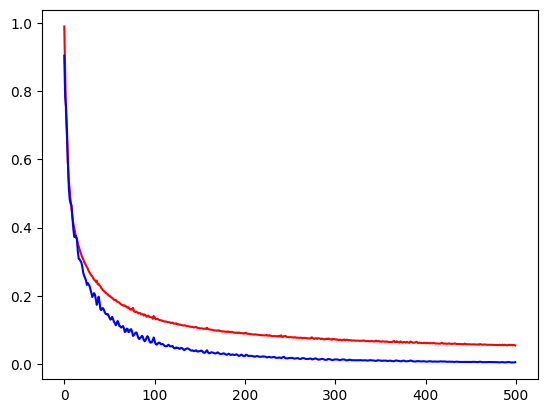

In [ ]:
# 시각화를 통한 overfitting 확인
print(history.history.keys())

plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.show()

# val_loss가 더 낮음을 확인
# loss가 우하향을 하는 것을 확인하면서 잘 만들어진 모델이라는 것을 알 수 있음

# MNIST
- **비정형 데이터**
- 이미지 1장이 3차원 (RGB), 이미지 여러 장이 모이면 4차원 data
- Machine Learning 입력(2차원)으로 넣을 수 없음
- RGB의 평균으로 RGB 값을 채워서 gray-scaled Image(3차원 or 2차원)으로 표현
- 2차원 데이터도 여러 장이 모이면 3차원이 되므로, (28,28) 등의 2D를 (784,)인 1D로 강제 변형
- 1D로 변경하면서 이미지의 공간 개념이 사라짐

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### 1. data

In [ ]:
# Raw Data Loading
data = r'/content/drive/MyDrive/LikeLion/ML/data/mnist/train.csv'
df = pd.read_csv(data)

display(df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


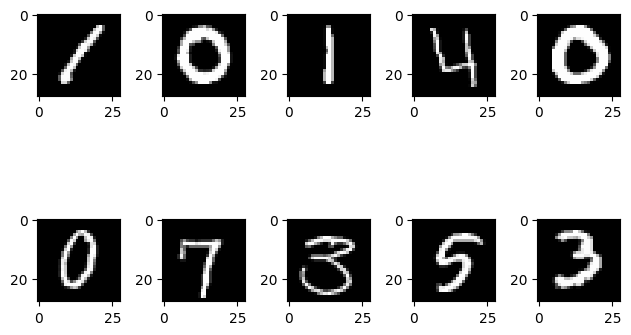

In [ ]:
# shape
df.shape  # (42000, 785)

# 이미지 데이터의 경우 이미지로부터 픽셀을 뽑아냈기 때문에 이상치, 결측치 존재할 가능성이 낮음
# 확인은 해줘야 함
df.isnull().sum().value_counts()  # 결측치 없음

# 정규화 하기 전에 이미지를 눈으로 확인
img_data = df.drop('label', axis=1, inplace=False).values

fig = plt.figure()
fig_arr = []  # subplot을 저장하는 list

for n in range(0, 10):
    fig_arr.append(fig.add_subplot(2, 5, n+1))
    fig_arr[n].imshow(img_data[n].reshape(28,28),
                       cmap='gray',
                       interpolation='nearest')

plt.tight_layout()
plt.show()

# feature, target
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df["label"].values

# 0 ~ 255 사이의 값이므로 정규화 필요
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# train, test 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=1)

# 학습용 데이터: 29,400개
# 평가용 데이터: 12,600개

### 2. Tensorflow Keras Model

In [ ]:
# Module import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Model
keras_model = Sequential()

# Layers
keras_model.add(Flatten(input_shape=(784,)))

keras_model.add(Dense(units=10,
                activation="softmax"))

# Compile
keras_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss="sparse_categorical_crossentropy",
                    metrics=["acc"])

# Summary
keras_model.summary()
# Output Shape (None, ): 입력이 몇인지 모르는 상태이니까

# Param # : 7840개의 w값, 10개의 bias값
# 7840개는 784개의 feature에 대해서 10개의 output이 있으므로

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 학습
history = keras_model.fit(x_data_train_norm,
                          t_data_train,
                          epochs=100,
                          verbose=1,
                          validation_split=0.2,
                          batch_size=100)  # 데이터를 100개씩 가져와서 294번 학습

# 236/236 [==============================] - 1s 4ms/step - loss: 0.2537 - acc: 0.9296 - val_loss: 0.2854 - val_acc: 0.9199

- Batch Size를 사용

    1. 메모리 효율성: 전체 데이터셋을 한 번에 모델에 넣는 것은 메모리를 많이 요구하며, 큰 데이터셋의 경우 메모리 부족 문제가 발생할 수 있습니다. 작은 미니배치로 나누어 사용하면 메모리를 효율적으로 사용할 수 있습니다.

    2. 계산 효율성: 미니배치 학습은 병렬 계산을 가능하게 하여 GPU를 활용하여 학습 속도를 향상시킬 수 있습니다. GPU는 대규모 병렬 계산에 최적화되어 있어 작은 미니배치를 동시에 처리할 수 있습니다.

    3. 수렴 속도 향상: 작은 미니배치를 사용하면 더 자주 모델의 파라미터를 업데이트할 수 있으며, 이는 모델의 수렴을 빠르게 할 수 있습니다.

- 주의사항:

    - 너무 작은 Batch Size: Batch Size가 너무 작으면 효과적인 일반화가 어려울 수 있습니다. 미니배치의 크기가 작으면 모델이 학습 데이터의 노이즈에 민감해질 수 있습니다.

    - 큰 Batch Size: 반대로 큰 Batch Size는 더 안정적인 그레디언트를 제공할 수 있지만, 높은 메모리 요구사항과 더 느린 학습 속도를 가져올 수 있습니다.

In [ ]:
# module import
import tensorflow as tf

# 평가를 진행
print(keras_model.evaluate(x_data_test_norm, t_data_test))
# [0.2912968397140503, 0.9177777767181396]

# 결과 report (accuracy, recall, precision, f1) 출력
# classificaiton_report 이용시 주의사항은 one-hot으로 표현하지 않음
# 1차원으로 표현(label값을 이용한 1차원 값으로 사용)
keras_model.predict(x_data_test_norm)  # 각 label에 대해서 확률이 출력됨
predict_label = tf.argmax(keras_model.predict(x_data_test_norm), axis=1).numpy()  # argmax(, axis=1):행들 중에서 열의 값이 가장 큰 데이터의 index

print(classification_report(t_data_test, predict_label))

394/394 [==============================] - 1s 3ms/step - loss: 0.2908 - acc: 0.9164
[0.2907775640487671, 0.9164285659790039]
394/394 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1240
           1       0.95      0.97      0.96      1405
           2       0.91      0.89      0.90      1253
           3       0.90      0.88      0.89      1305
           4       0.93      0.93      0.93      1222
           5       0.88      0.85      0.87      1139
           6       0.94      0.96      0.95      1241
           7       0.93      0.92      0.92      1320
           8       0.89      0.88      0.89      1219
           9       0.87      0.90      0.89      1256

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



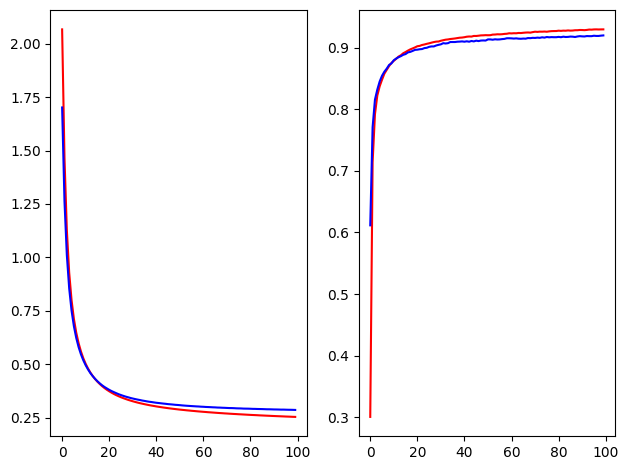

In [ ]:
# 그래프 그리기
loss = history.history['loss']
acc = history.history['acc']

val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(loss, color='r')
ax1.plot(val_loss, color='b')

ax2.plot(acc, color='r')
ax2.plot(val_acc, color='b')

plt.tight_layout()
plt.show()

### 3. 제출

In [ ]:
# Test Data Loading
data = r'/content/drive/MyDrive/LikeLion/ML/data/mnist/test.csv'
df_test = pd.read_csv(data)
display(df_test.head())

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 실제 test 데이터에 대해서 예측
x_test = df_test.values
x_test_norm = scaler.transform(x_test)
predict_labels = tf.argmax(keras_model.predict(x_test_norm), axis=1).numpy().flatten()

# 예측한 데이터 제출 형식으로 변환
df_result = pd.DataFrame(predict_labels, columns=["Label"])
df_result = df_result.reset_index()
df_result = df_result.rename(columns={'index': 'ImageId'})
df_result["ImageId"] += 1

# 제출 파일
df_result.to_csv('/content/drive/MyDrive/LikeLion/ML/data/mnist/submission.csv', index=False)

875/875 [==============================] - 3s 4ms/step


### 4. 결과
- 0.91682
- 학습이 잘 되었다고 생각할 수 있지만 이미지가 너무 단순함
- MNIST보다 조금 더 보갖ㅂ한 이미지를 사용하면 어떻게 될까?
    - Fashion MNIST

# Fashion MNIST

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### 1. data

In [ ]:
# Raw Data Loading
data = r'/content/drive/MyDrive/LikeLion/ML/data/fashion-mnist_train.csv'
df = pd.read_csv(data)

display(df.head())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


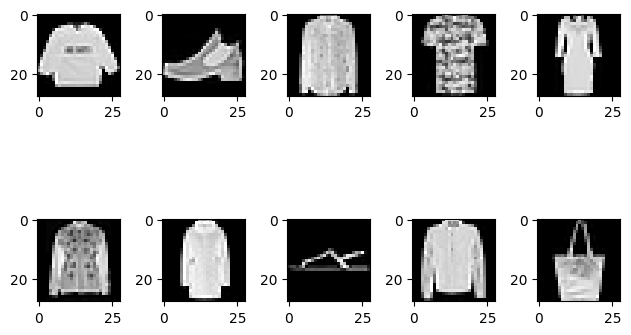

In [ ]:
# shape
df.shape  # (60000, 785)

# 이미지 데이터의 경우 이미지로부터 픽셀을 뽑아냈기 때문에 이상치, 결측치 존재할 가능성이 낮음
# 확인은 해줘야 함
df.isnull().sum().value_counts()  # 결측치 없음

# 정규화 하기 전에 이미지를 눈으로 확인
img_data = df.drop('label', axis=1, inplace=False).values

fig = plt.figure()
fig_arr = []  # subplot을 저장하는 list

for n in range(0, 10):
    fig_arr.append(fig.add_subplot(2, 5, n+1))
    fig_arr[n].imshow(img_data[n].reshape(28,28),
                       cmap='gray',
                       interpolation='nearest')

plt.tight_layout()
plt.show()

# feature, target
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df["label"].values

# 0 ~ 255 사이의 값이므로 정규화 필요
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# train, test 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=1)

# 학습용 데이터: 29,400개
# 평가용 데이터: 12,600개

In [ ]:
# Module import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Model
keras_model = Sequential()

# Layers
keras_model.add(Flatten(input_shape=(784,)))

keras_model.add(Dense(units=10,
                activation="softmax"))

# Compile
keras_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss="sparse_categorical_crossentropy",
                    metrics=["acc"])

# Summary
keras_model.summary()
# Output Shape (None, ): 입력이 몇인지 모르는 상태이니까

# Param # : 7840개의 w값, 10개의 bias값
# 7840개는 784개의 feature에 대해서 10개의 output이 있으므로

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 학습
history = keras_model.fit(x_data_train_norm,
                          t_data_train,
                          epochs=100,
                          verbose=1,
                          validation_split=0.2,
                          batch_size=100)  # 데이터를 100개씩 가져와서 294번 학습

# 236/236 [==============================] - 1s 4ms/step - loss: 0.2537 - acc: 0.9296 - val_loss: 0.2854 - val_acc: 0.9199

In [ ]:
# module import
import tensorflow as tf

# 평가를 진행
print(keras_model.evaluate(x_data_test_norm, t_data_test))
# [0.2912968397140503, 0.9177777767181396]

# 결과 report (accuracy, recall, precision, f1) 출력
# classificaiton_report 이용시 주의사항은 one-hot으로 표현하지 않음
# 1차원으로 표현(label값을 이용한 1차원 값으로 사용)
keras_model.predict(x_data_test_norm)  # 각 label에 대해서 확률이 출력됨
predict_label = tf.argmax(keras_model.predict(x_data_test_norm), axis=1).numpy()  # argmax(, axis=1):행들 중에서 열의 값이 가장 큰 데이터의 index

print(classification_report(t_data_test, predict_label))

563/563 [==============================] - 2s 3ms/step - loss: 0.4368 - acc: 0.8525
[0.4368054270744324, 0.8525000214576721]
563/563 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1800
           1       0.97      0.95      0.96      1800
           2       0.74      0.74      0.74      1800
           3       0.86      0.86      0.86      1800
           4       0.72      0.81      0.76      1800
           5       0.95      0.92      0.94      1800
           6       0.67      0.56      0.61      1800
           7       0.91      0.94      0.92      1800
           8       0.94      0.94      0.94      1800
           9       0.94      0.95      0.95      1800

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000



-  학습 결과를 보니 recall 값이 0.56까지 떨어지는 label도 존재
- 복잡한 이미지를 다룰 수 있는 학습 모델 필요